# Lecture  des données et import du model

In [1]:
import innvestigate
import numpy as np
from keras.models import load_model
model = load_model('model.h5')
import pickle

train_x = pickle.load(open('train_x.pickle', "rb"))
test_x = pickle.load(open('test_x.pickle', "rb"))
test_y = pickle.load(open('test_y.pickle', "rb"))
print(test_x.shape)
print(test_y.shape)
tests = np.append(test_x, test_y, axis=1)
print(tests)
print(tests.shape)
tests_sorted_by_class = tests[np.lexsort((tests[:,-6], tests[:,-5], tests[:,-4], tests[:,-3], tests[:,-2], tests[:,-1]))]


Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


(692, 54630)
(692, 6)
[[0.19089961 0.21130225 0.18640576 ... 0.         0.         0.        ]
 [0.27500921 0.38111085 0.38379639 ... 0.         0.         0.        ]
 [0.24496546 0.30695182 0.29934913 ... 0.         0.         0.        ]
 ...
 [0.31137288 0.3630031  0.33923629 ... 0.         0.         0.        ]
 [0.23042262 0.37046516 0.39324811 ... 0.         0.         0.        ]
 [0.43728897 0.48186278 0.44348469 ... 0.         1.         0.        ]]
(692, 54636)


# Séparation du dataset par ses classes

In [2]:

print(tests_sorted_by_class)
classes_index = {}
for i in range(1, 7):
    print(i)
    print(np.argwhere(tests_sorted_by_class[-i]>0))
    classes_index[str(6-i)]=np.argwhere(tests_sorted_by_class[-i]==1)

classes = {}
classes['0'] = []
classes['1'] = []
classes['2'] = []
classes['3'] = []
classes['4'] = []
classes['5'] = []
for i in tests_sorted_by_class:
    classes[str(list(i[-6:]).index(1))].append(i[:-6])
print(classes.keys())
for i in classes:
    print("Len "+str(i)+" = "+str(len(classes[i])))


[[0.19089961 0.21130225 0.18640576 ... 0.         0.         0.        ]
 [0.31935024 0.33635092 0.35284308 ... 0.         0.         0.        ]
 [0.26457891 0.3296994  0.26927337 ... 0.         0.         0.        ]
 ...
 [0.25990656 0.35628626 0.35289407 ... 0.         0.         1.        ]
 [0.2788938  0.30036151 0.37728849 ... 0.         0.         1.        ]
 [0.3346293  0.41940919 0.4089857  ... 0.         0.         1.        ]]
1
[[    0]
 [    1]
 [    2]
 ...
 [54628]
 [54629]
 [54635]]
2
[[    0]
 [    1]
 [    2]
 ...
 [54628]
 [54629]
 [54635]]
3
[[    0]
 [    1]
 [    2]
 ...
 [54628]
 [54629]
 [54635]]
4
[[    0]
 [    1]
 [    2]
 ...
 [54628]
 [54629]
 [54635]]
5
[[    0]
 [    1]
 [    2]
 ...
 [54628]
 [54629]
 [54635]]
6
[[    0]
 [    1]
 [    2]
 ...
 [54628]
 [54629]
 [54635]]
dict_keys(['0', '1', '2', '3', '4', '5'])
Len 0 = 254
Len 1 = 172
Len 2 = 158
Len 3 = 21
Len 4 = 68
Len 5 = 19


In [3]:

methods = [
    ("lrp.z"),
    ]

analyzers = {}
method = methods[0]
print(methods)
print("Analyzer for Method : "+str(method))    
analyzer = innvestigate.create_analyzer(method, model)
analyzer.fit(train_x, batch_size=256, verbose=1)


['lrp.z']
Analyzer for Method : lrp.z


/home/raysamram/py_37_env/lib/python3.7/site-packages/innvestigate/analyzer/base.py:130: RuntimeWarning: This analyzer does not need to be trained. Still fit() is called.
  " Still fit() is called.", RuntimeWarning)


# Analyse de chaque classe avec LRP et sauvegarde des résultats

In [4]:
import os

#classes = ["0" ,"1", "2", "3", "4", "5"]
for i in classes:
    print("Analyzing for class "+str(i))
    if os.path.isfile("class"+str(i)):
        print("Class already treated.")
    else:
        print("Let's analyze")
        #results[str(i)] = []
        tmp = []
        for j in range(100):
            x = np.array(classes[i])
            gres = analyzer.analyze(x)
            #print("mid res :"+str(gres))
            tmp.append(gres)    
        pickle_out = open("class"+str(i),"wb")
        pickle.dump(tmp, pickle_out)


Analyzing for class 0
Class already treated.
Analyzing for class 1
Class already treated.
Analyzing for class 2
Class already treated.
Analyzing for class 3
Class already treated.
Analyzing for class 4
Class already treated.
Analyzing for class 5
Class already treated.


In [5]:
means = {}
import pickle
import numpy as np
classes = ["0", "1", "2", "3", "4", "5"]
for i in classes:
    print("class i"+str(i))
    file = open("class"+str(i),"rb")
    mat = np.array(pickle.load(file))
    mean = mat.mean(0)
    means[i] = mean
    del mean
    file.close()

class i0
class i1
class i2
class i3
class i4
class i5


# Import des analyses et représentation en HeatMap

[[-1.1148761e-04 -2.0989403e-04 -4.7432751e-04 ... -3.3686883e-05
  -5.7261530e-04  1.5816843e-04]
 [-9.4376615e-04  5.3856469e-04 -8.7234384e-04 ...  2.4171379e-05
   8.9295808e-04  2.4130401e-05]
 [ 2.7431306e-04 -4.4342163e-05 -3.8860868e-05 ...  4.9932300e-05
   2.5993204e-04  6.8716043e-05]
 [-1.4411100e-03 -1.5075462e-03 -5.6458818e-04 ... -3.3406809e-04
  -1.9382710e-04 -3.9069762e-04]
 [ 2.6281137e-05 -3.9020315e-04 -3.2417729e-04 ...  2.0480864e-05
  -2.0590915e-04  4.6407498e-05]
 [ 6.3811007e-05  1.4511331e-04  1.1031990e-04 ... -4.3267931e-07
   1.8106310e-05 -1.5770480e-05]]
SHAPE : (6, 54630)


Text(0.5, 156.5, 'Importance des variables')

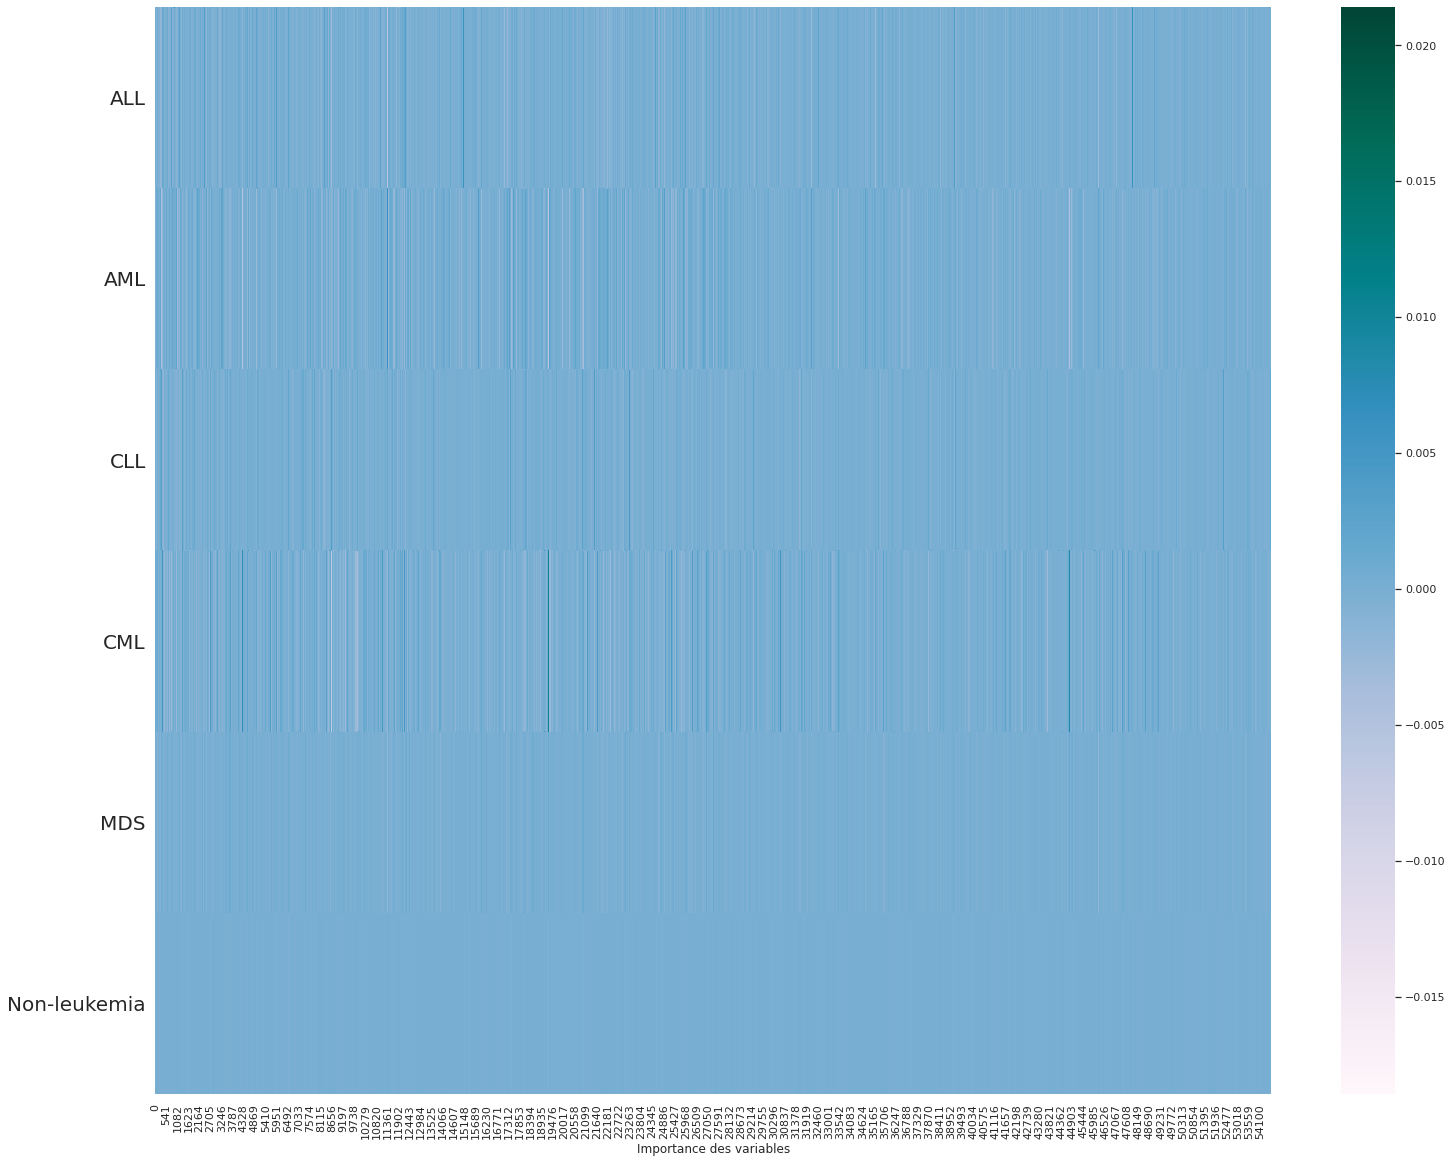

In [6]:
plots = []
sorted_plots = []
inverse_sort = []
classes_equivalents = ["ALL", "AML", "CLL", "CML", "MDS", "Non-leukemia"]
for i in means:
    plots.append(means[i][0])
toplot = np.array(plots)
print(str(toplot))
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
print("SHAPE : "+str(toplot.shape))

# We use ax parameter to tell seaborn which subplot to use for this plot
f,ax = plt.subplots(1,sharey=True)
f.set_figheight(20)
f.set_figwidth(25)

g1 = sns.heatmap(toplot,cmap="PuBuGn",ax=ax)
g1.set(yticklabels = classes_equivalents)
plt.yticks(fontsize=20, rotation=0)
g1.set_ylabel('')
g1.set_xlabel('Importance des variables')

# ACP

In [3]:
i = 0
file = open("class"+str(i),"rb")
mat = np.array(pickle.load(file))
print("Shape : "+str(mat.shape))
print(mat[0])

Shape : (100, 254, 54630)
[[-1.1148752e-04 -2.0989403e-04 -4.7432815e-04 ... -3.3686923e-05
  -5.7261577e-04  1.5816851e-04]
 [-2.8908134e-05 -8.1120175e-05 -3.0439769e-04 ... -9.8001974e-06
  -2.1722235e-04  4.5154677e-05]
 [-7.0069655e-05 -2.0924033e-04 -3.2216715e-04 ... -2.0722118e-05
  -3.5230105e-04  1.3263995e-05]
 ...
 [-6.9787173e-05 -1.5873543e-04 -3.1970063e-04 ... -6.0214193e-06
  -3.3002370e-04  6.5594097e-05]
 [-1.2413627e-05  2.4847901e-05 -1.4012083e-04 ...  1.4843635e-05
  -1.5769304e-04  1.0774781e-04]
 [-8.7530032e-05 -3.1484667e-06 -4.2236134e-04 ...  4.9338443e-05
  -2.1884764e-04  1.6346015e-04]]


# Clustering Hiéarchique

Class 0
let's cluster


<Figure size 576x432 with 0 Axes>

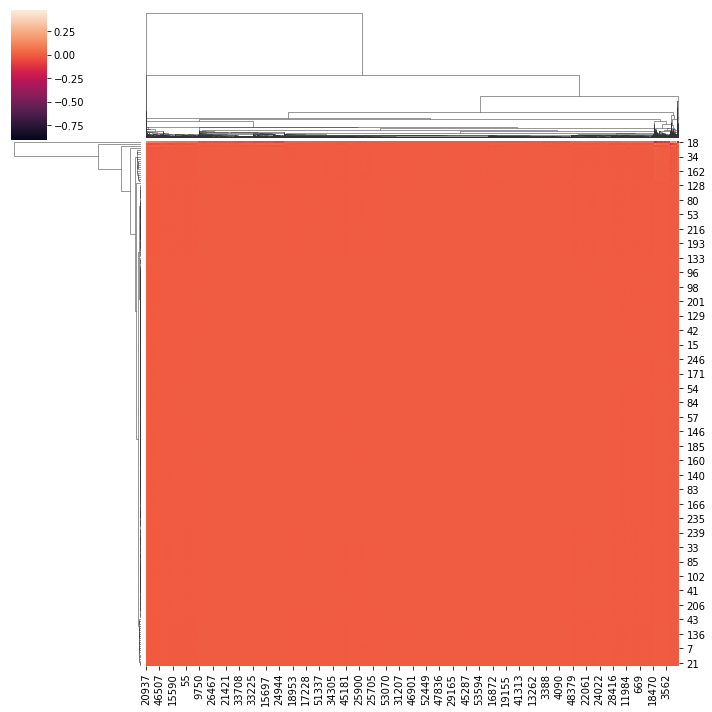

Class 1
let's cluster


<Figure size 576x432 with 0 Axes>

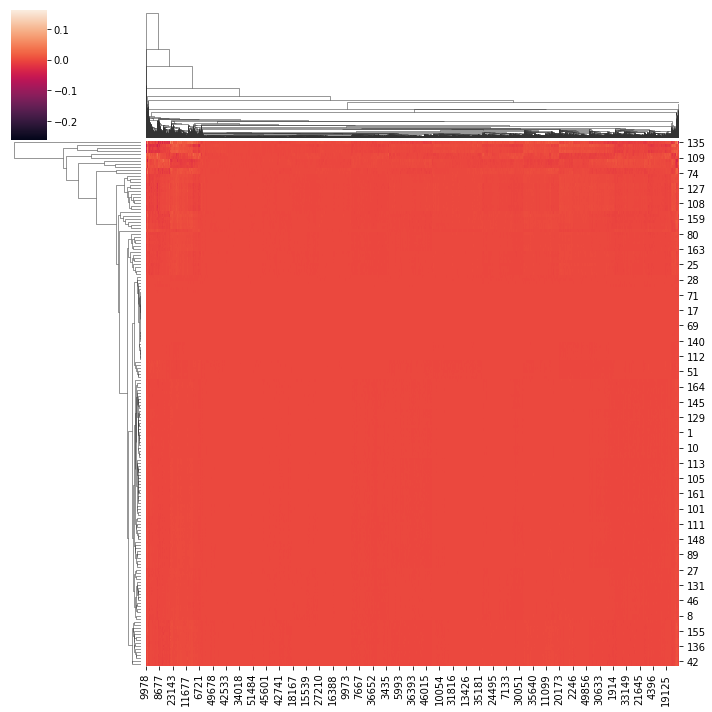

Class 2
let's cluster


<Figure size 576x432 with 0 Axes>

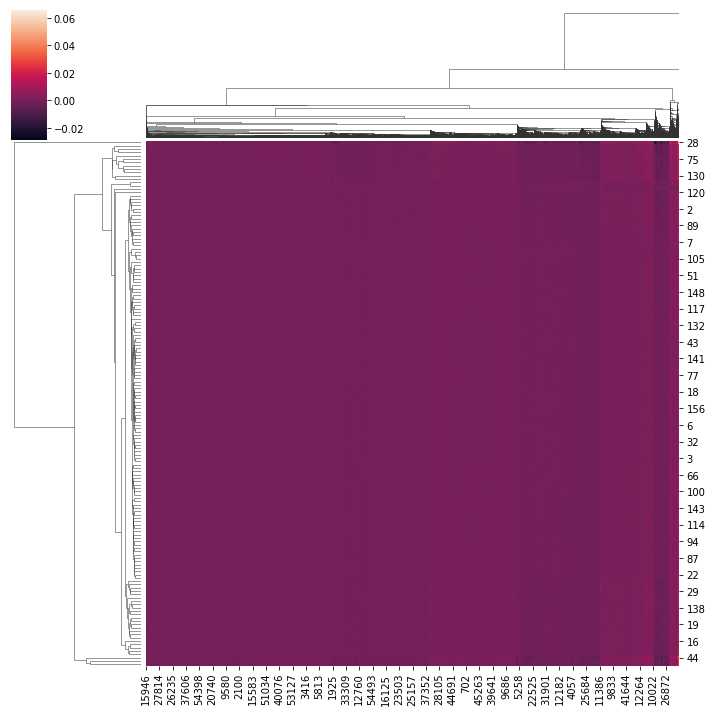

Class 3
let's cluster


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import fastcluster
from scipy.cluster.hierarchy import dendrogram, linkage


import scipy.spatial as spatial
from sklearn.decomposition import PCA
classes_equivalents = ["ALL", "AML", "CLL", "CML", "MDS", "Non-leukemia"]

for i in range(6):
    print("Class "+str(i))
    sc = StandardScaler()
    file = open("class"+str(i),"rb")
    mat = np.array(pickle.load(file))
    file.close()    
    Z = sc.fit_transform(mat[0])
    acp = PCA(svd_solver='full', n_components=10)

    x_pca = acp.fit_transform(Z)
    plt.figure(figsize=(8,6))
    sns.clustermap(mat[0])
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import fastcluster
from scipy.cluster.hierarchy import dendrogram, linkage


import scipy.spatial as spatial
from sklearn.decomposition import PCA
classes_equivalents = ["ALL", "AML", "CLL", "CML", "MDS", "Non-leukemia"]

for i in range(6):
g = sns.pairplot(df, kind="reg", palette="husl", corner=True)

# Clustering par KMeans et Silouhette

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print(x_pca.shape)
print(x_pca[:,:2].shape)
print(x_pca)
range_n_clusters = range(2,6)
best_score = 0
best_predicts  = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(x_pca[:,:2])
    centers = clusterer.cluster_centers_
    score = silhouette_score(x_pca[:,:2], preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    if score>best_score:
        best_score = score
        best_predicts = preds
        best_centers = centers
        
print(best_predicts)

(6, 6)
(6, 2)
[[-6.4805001e-02 -6.9040574e-02 -7.9707369e-02 -4.3072212e-02
  -9.9071371e-04 -2.6039144e-05]
 [ 1.5952212e-01  4.9680859e-02 -2.5721073e-02 -3.9277095e-02
   1.1763710e-02  8.7662083e-05]
 [-1.8728260e-02 -2.0217188e-02  7.9896003e-02 -4.9756970e-02
   5.0439537e-03  9.8296732e-05]
 [-1.2713721e-01  1.2438634e-01 -1.9506726e-02 -2.9078828e-02
   1.6992697e-02  6.9385953e-04]
 [-3.3046320e-02 -3.1372089e-02 -2.9174036e-03 -1.0012487e-02
   3.3434901e-02  2.9586352e-04]
 [ 8.6828582e-03  3.3674708e-03 -9.5522252e-04  6.7251087e-03
  -8.1489896e-03 -5.7723340e-05]]
For n_clusters = 2, silhouette score is 0.43324851989746094)
For n_clusters = 3, silhouette score is 0.4639778137207031)
For n_clusters = 4, silhouette score is 0.236979678273201)
For n_clusters = 5, silhouette score is 0.18827927112579346)
[0 1 0 2 0 0]


Text(0.1, 0.13, 'Silhouette  score = 0.4639778')

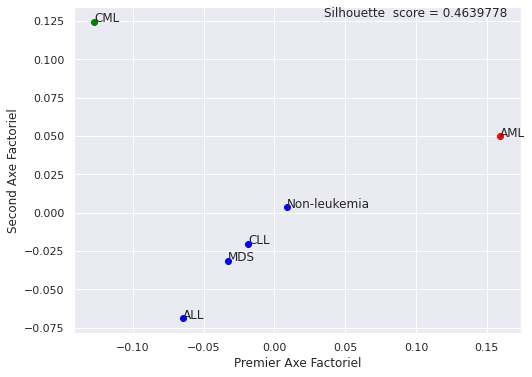

In [9]:
plt.figure(figsize=(8,6))
colors = {
    '0':'blue',
    '1':'red',
    '2':'green'
}
for i in range(6):
    plt.scatter(x_pca[i,0],x_pca[i,1],cmap='plasma', color=colors[str(best_predicts[i])])

for i, txt in enumerate(classes_equivalents):
    plt.annotate(txt, (x_pca[i,0], x_pca[i,1]))
plt.xlabel('Premier Axe Factoriel')
plt.ylabel('Second Axe Factoriel')
plt.text(0.10,0.13,'Silhouette  score = '+str(best_score),
     horizontalalignment='center',
     verticalalignment='center')